In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import os
import seaborn as sns
import matplotlib.pyplot as plt
params = {'font.family': 'serif',
          'font.sans-serif': 'Times New Roman',
          'font.size': 14,
          'lines.linewidth': 2,
          'text.usetex': False,
          'xtick.top': True,
          'xtick.minor.visible': True,
          'ytick.minor.visible': True,
          'xtick.direction': 'in',
          'xtick.major.top': True,
          'xtick.major.bottom': True,
          'xtick.minor.top': True,
          'xtick.minor.bottom': True,
          'xtick.minor.width': 1,
          'xtick.major.width': 1,
          'xtick.minor.size': 3, 
          'xtick.major.size': 6,
          'ytick.right': True,
          'ytick.direction': 'in',
          'ytick.major.left': True,
          'ytick.major.right': True,
          'ytick.minor.left': True,
          'ytick.minor.right': True,
          'ytick.minor.width': 1,
          'ytick.major.width': 1,
          'ytick.minor.size': 3,
          'ytick.major.size': 6,
          'legend.frameon': False,
          'lines.markersize': 4.0,
          'axes.formatter.use_mathtext': True}
plt.rcParams.update(params)

In [2]:
root = '/kaggle/input/fork-of-debiasing-wf-research-links/'

In [3]:
ppb_accuracy = np.load(os.path.join(root, 'ppb_accuracy.npy'))
ppb_accuracy = ppb_accuracy.reshape(5, 4, 4)

In [4]:
standard_classifier_probs = np.asarray([0.60069793, 0.73532647, 0.6981353 , 0.65038615])

In [5]:
labels = ['Light Female', 'Light Male', 'Dark Female', 'Dark Male']

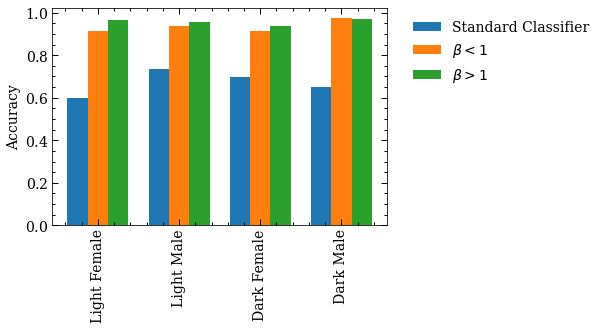

In [6]:
ind = np.arange(len(labels))
plt.bar(ind-0.25, standard_classifier_probs, width=0.25, label=r'Standard Classifier')
plt.bar(ind, ppb_accuracy[0].mean(axis=0), width=0.25, label=r'$\beta<1$')
plt.bar(ind+0.25, ppb_accuracy[1].mean(axis=0), width=0.25, label=r'$\beta>1$')
plt.xticks(ticks=ind, labels=labels, rotation=90)
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [7]:
img1 = np.load(os.path.join(root, 'img2_beta 0.0005, alpha 0.001.npy'))
img2 = np.load(os.path.join(root, 'img2_beta 5, alpha 0.001.npy'))

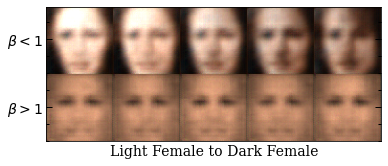

In [8]:
plt.imshow(np.vstack((img1, img2)))
# plt.axis('off')
plt.xlabel('Light Female to Dark Female')
plt.yticks(ticks=[30, 95], labels=[r'$\beta<1$', r'$\beta>1$'])
plt.gca().set_xticks([])
# for minor ticks
plt.gca().set_xticks([], minor=True)
plt.show()

In [9]:
alphas = [0.1, 0.05, 0.01, 0.001]
betas = [0.0005, 1.01, 5, 10, 15]

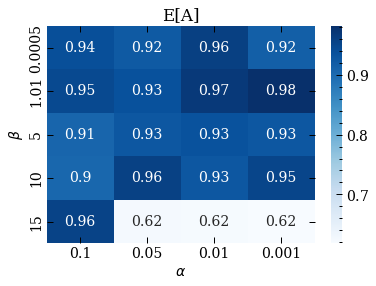

In [10]:
sns.heatmap(ppb_accuracy.mean(axis=-1),
            yticklabels=betas,
            xticklabels=alphas,
            annot=True,
            cmap='Blues')
plt.gca().set_xticks([], minor=True)
plt.gca().set_yticks([], minor=True)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.title('E[A]')
# plt.gca().get_yaxis().set_major_formatter(
#     matplotlib.ticker.ScalarFormatter())
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useOffset=False)
plt.show()

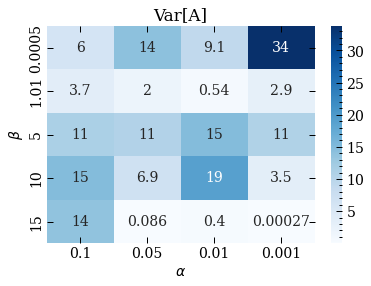

In [11]:
sns.heatmap(ppb_accuracy.var(axis=-1)*10000,
            yticklabels=betas,
            xticklabels=alphas,
            annot=True,
            cmap='Blues')
plt.gca().set_xticks([], minor=True)
plt.gca().set_yticks([], minor=True)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.title('Var[A]')
# plt.gca().get_yaxis().set_major_formatter(
#     matplotlib.ticker.ScalarFormatter())
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useOffset=False)
plt.show()